In [15]:
#Setup & Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller

plt.style.use("seaborn-v0_8")


In [16]:
# Load Dataset

df = pd.read_csv(r"..\data\raw\sales_data.csv")


In [17]:
# Basic Dataset Understanding (First Look)

## Shape and Size
df.shape



(76000, 16)

In [18]:

## Column Names & Data Types
df.dtypes


Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Price                 float64
Discount                int64
Weather Condition      object
Promotion               int64
Competitor Pricing    float64
Seasonality            object
Epidemic                int64
Demand                  int64
dtype: object

In [19]:
# Preview the Data head
df.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [20]:
# Preview the Data tail
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84
75999,2024-01-30,S005,P0020,Toys,North,126,63,59,25.78,10,Snowy,0,29.32,Winter,0,73


In [21]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [23]:
#Date & Time Analysis (VERY IMPORTANT)

## Convert Date Column
df['Datetime'] = pd.to_datetime(df['Date'])


In [26]:
##Check Date Range Coverage
df['Datetime'].min(), df['Datetime'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2024-01-30 00:00:00'))

In [ ]:
## Check Frequency (Daily / Weekly / Monthly)

df['Datetime'].sort_values().diff().value_counts().head()


Datetime
0 days    75240
1 days      759
Name: count, dtype: int64

In [32]:
# Target Variable Analysis (Sales / Demand)

df['Demand'].describe()

count    76000.000000
mean       104.317158
std         46.964801
min          4.000000
25%         71.000000
50%        100.000000
75%        133.000000
max        430.000000
Name: Demand, dtype: float64

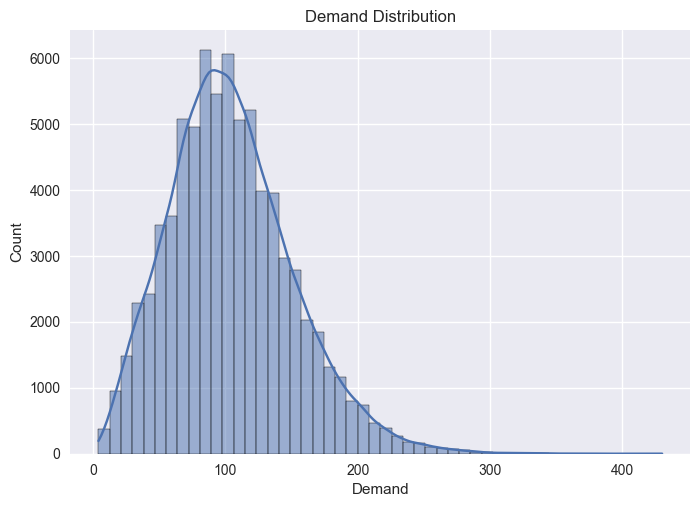

In [43]:
## Distribution Plot
sns.histplot(df['Demand'], bins=50, kde=True)
plt.title("Demand Distribution")
plt.show()

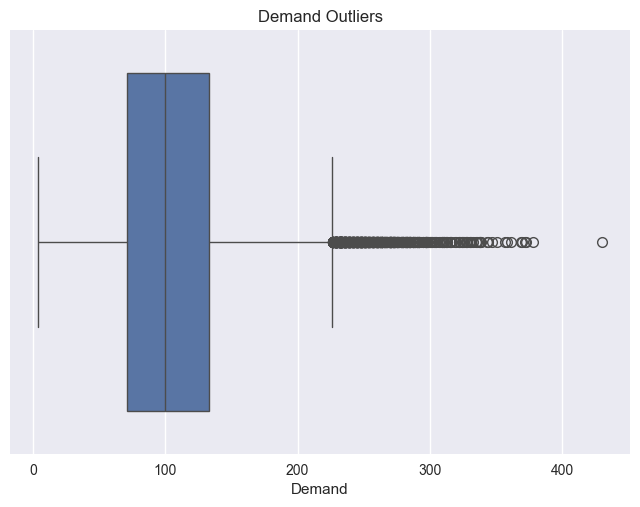

In [44]:
#Boxplot (Outlier Detection)

sns.boxplot(x=df['Demand'])
plt.title("Demand Outliers")
plt.show()


In [46]:
# Missing Values Analysis
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
Datetime              0
dtype: int64

In [47]:
#Missing Value Percentage
(df.isna().mean() * 100).sort_values(ascending=False)


Date                  0.0
Store ID              0.0
Product ID            0.0
Category              0.0
Region                0.0
Inventory Level       0.0
Units Sold            0.0
Units Ordered         0.0
Price                 0.0
Discount              0.0
Weather Condition     0.0
Promotion             0.0
Competitor Pricing    0.0
Seasonality           0.0
Epidemic              0.0
Demand                0.0
Datetime              0.0
dtype: float64

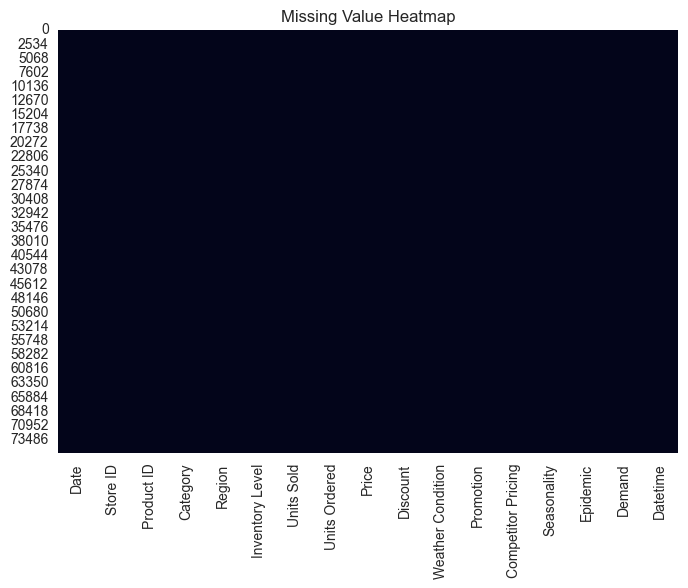

In [48]:
# Missing Value Heatmap
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


In [51]:
# Duplicate Records
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
75995    False
75996    False
75997    False
75998    False
75999    False
Length: 76000, dtype: bool

In [ ]:
## if dupliacte records exist, create a new column and mark them as TRUE
df[df.duplicated()]


In [ ]:
# Categorical Feature Analysis

## Unique counts
df.nunique()


Product ID
P0001    3800
P0002    3800
P0003    3800
P0004    3800
P0005    3800
P0006    3800
P0007    3800
P0008    3800
P0009    3800
P0010    3800
P0011    3800
P0012    3800
P0013    3800
P0014    3800
P0015    3800
P0016    3800
P0017    3800
P0018    3800
P0019    3800
P0020    3800
Name: count, dtype: int64

In [59]:
## value count
df['Product ID'].value_counts().head(10)


Product ID
P0001    3800
P0002    3800
P0003    3800
P0004    3800
P0005    3800
P0006    3800
P0007    3800
P0008    3800
P0009    3800
P0010    3800
Name: count, dtype: int64

In [ ]:
#Category vs Sales

df.groupby('Category')['Demand'].mean().sort_values(ascending=False)



array(['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture'],
      dtype=object)

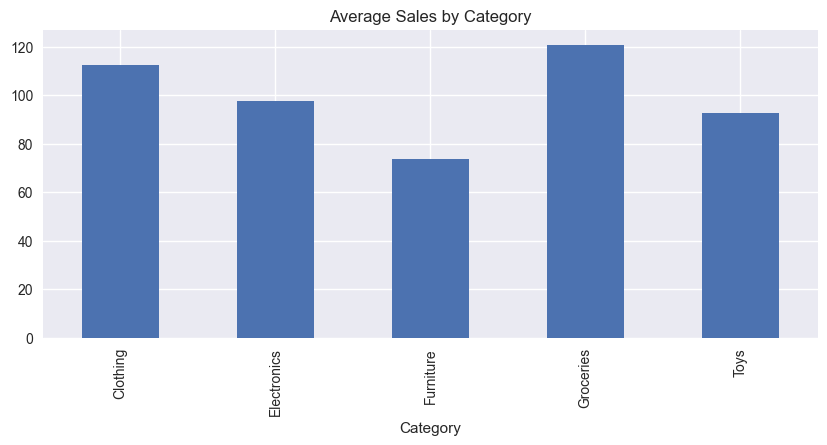

In [ ]:
#visualization
df.groupby('Category')['Demand'].mean().plot(kind='bar', figsize=(10,4))
plt.title("Average Demand by Category")
plt.show()